In [1]:
# ===================================================================
# ANALISIS DATA DAN VISUALISASI 3D INTERAKTIF
# Dataset: Data Konsumsi Kopi dan Kesehatan
# ===================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style untuk matplotlib
plt.style.use('default')
sns.set_palette("husl")

print("🔍 ANALISIS DATA DAN VISUALISASI 3D INTERAKTIF")
print("="*60)

🔍 ANALISIS DATA DAN VISUALISASI 3D INTERAKTIF


In [2]:
# ===================================================================
# 1. MEMBACA DAN MEMUAT DATA
# ===================================================================

print("\n📊 1. MEMUAT DATA")
print("-" * 30)

# Membaca dataset
try:
    # Coba baca file yang diupload
    df = pd.read_csv('data_kopi.csv')
    print("✅ Data berhasil dimuat dari 'data_kopi.csv'")
except:
    try:
        # Fallback ke data.csv jika ada
        df = pd.read_csv('data.csv')
        print("✅ Data berhasil dimuat dari 'data.csv'")
    except:
        print("❌ File CSV tidak ditemukan. Membuat data contoh...")
        # Buat data contoh jika file tidak ditemukan
        np.random.seed(42)
        n_samples = 100
        data = {
            'ID': range(1, n_samples + 1),
            'Usia': np.random.randint(20, 60, n_samples),
            'Cangkir_Per_Hari': np.random.randint(1, 8, n_samples),
            'Kafein_mg': np.random.randint(50, 600, n_samples),
            'Kualitas_Tidur': np.random.randint(1, 10, n_samples),
            'Tekanan_Darah_Sistolik': np.random.randint(100, 160, n_samples),
            'Detak_Jantung': np.random.randint(60, 100, n_samples),
            'Energi_Harian': np.random.randint(1, 10, n_samples),
            'Tingkat_Stress': np.random.randint(1, 10, n_samples),
            'Produktivitas': np.random.randint(1, 10, n_samples)
        }
        df = pd.DataFrame(data)
        print("✅ Data contoh berhasil dibuat")

print(f"📋 Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")


📊 1. MEMUAT DATA
------------------------------
❌ File CSV tidak ditemukan. Membuat data contoh...
✅ Data contoh berhasil dibuat
📋 Ukuran dataset: 100 baris, 10 kolom


In [3]:
# ===================================================================
# 2. ANALISIS DATA AWAL
# ===================================================================

print("\n🔍 2. ANALISIS DATA AWAL")
print("-" * 30)

# Informasi dataset
print("📌 INFORMASI DATASET:")
print(df.info())

print("\n📊 5 BARIS PERTAMA:")
print(df.head())

print("\n📈 STATISTIK DESKRIPTIF:")
print(df.describe())

print("\n❓ MISSING VALUES:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ Tidak ada missing values")


🔍 2. ANALISIS DATA AWAL
------------------------------
📌 INFORMASI DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID                      100 non-null    int64
 1   Usia                    100 non-null    int32
 2   Cangkir_Per_Hari        100 non-null    int32
 3   Kafein_mg               100 non-null    int32
 4   Kualitas_Tidur          100 non-null    int32
 5   Tekanan_Darah_Sistolik  100 non-null    int32
 6   Detak_Jantung           100 non-null    int32
 7   Energi_Harian           100 non-null    int32
 8   Tingkat_Stress          100 non-null    int32
 9   Produktivitas           100 non-null    int32
dtypes: int32(9), int64(1)
memory usage: 4.4 KB
None

📊 5 BARIS PERTAMA:
   ID  Usia  Cangkir_Per_Hari  Kafein_mg  Kualitas_Tidur  \
0   1    58                 7        546               3   
1   2    48   

In [4]:
# ===================================================================
# 3. PERSIAPAN DATA UNTUK VISUALISASI 3D
# ===================================================================

print("\n🎨 3. PERSIAPAN DATA UNTUK VISUALISASI 3D")
print("-" * 30)

# Pilih kolom numerik untuk visualisasi 3D
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Kolom numerik yang tersedia: {numeric_cols}")

# Pilih 3 variabel utama untuk visualisasi 3D
if 'Kafein_mg' in numeric_cols and 'Kualitas_Tidur' in numeric_cols and 'Energi_Harian' in numeric_cols:
    x_var, y_var, z_var = 'Kafein_mg', 'Kualitas_Tidur', 'Energi_Harian'
elif len(numeric_cols) >= 3:
    x_var, y_var, z_var = numeric_cols[1:4]  # Skip ID jika ada
else:
    # Buat data 3D contoh
    x_var, y_var, z_var = 'X', 'Y', 'Z'



🎨 3. PERSIAPAN DATA UNTUK VISUALISASI 3D
------------------------------
📊 Kolom numerik yang tersedia: ['ID', 'Usia', 'Cangkir_Per_Hari', 'Kafein_mg', 'Kualitas_Tidur', 'Tekanan_Darah_Sistolik', 'Detak_Jantung', 'Energi_Harian', 'Tingkat_Stress', 'Produktivitas']


In [5]:
# ===================================================================
# 4. VISUALISASI 3D INTERAKTIF DENGAN PLOTLY
# ===================================================================

print("\n🌊 4. VISUALISASI 3D INTERAKTIF")
print("-" * 30)

# Buat multiple visualisasi 3D
fig_3d = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Scatter Plot 3D', 'Surface Plot', 'Mesh Plot', 'Contour + Scatter'),
    specs=[[{"type": "scatter3d"}, {"type": "surface"}],
           [{"type": "mesh3d"}, {"type": "scatter3d"}]],
    horizontal_spacing=0.1,
    vertical_spacing=0.1
)

# Ekstrak data
if x_var in df.columns:
    x_data = df[x_var].values
    y_data = df[y_var].values
    z_data = df[z_var].values
else:
    # Buat data contoh 3D yang menarik
    n_points = 50
    x_range = np.linspace(-5, 5, n_points)
    y_range = np.linspace(-5, 5, n_points)
    X, Y = np.meshgrid(x_range, y_range)
    
    # Buat permukaan gelombang yang menarik
    Z = np.sin(np.sqrt(X**2 + Y**2)) * np.cos(X) * np.exp(-0.1 * (X**2 + Y**2))
    
    # Untuk scatter plot, ambil subset data
    indices = np.random.choice(n_points*n_points, size=200, replace=False)
    x_data = X.flatten()[indices]
    y_data = Y.flatten()[indices]
    z_data = Z.flatten()[indices]

# 4.1 Scatter Plot 3D
if x_var in df.columns and 'Tingkat_Stress' in df.columns:
    color_data = df['Tingkat_Stress'].values
    color_label = 'Tingkat Stress'
else:
    color_data = z_data
    color_label = 'Z Value'

scatter_3d = go.Scatter3d(
    x=x_data,
    y=y_data,
    z=z_data,
    mode='markers',
    marker=dict(
        size=8,
        color=color_data,
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title=color_label, x=0.45)
    ),
    text=[f'X: {x:.2f}<br>Y: {y:.2f}<br>Z: {z:.2f}' for x, y, z in zip(x_data, y_data, z_data)],
    hovertemplate='<b>Point Info</b><br>%{text}<extra></extra>',
    name='Data Points'
)

fig_3d.add_trace(scatter_3d, row=1, col=1)

# 4.2 Surface Plot
if x_var not in df.columns:
    # Gunakan data mesh yang sudah dibuat
    X_surf, Y_surf, Z_surf = X, Y, Z
else:
    # Buat grid dari data yang ada
    x_min, x_max = x_data.min(), x_data.max()
    y_min, y_max = y_data.min(), y_data.max()
    
    xi = np.linspace(x_min, x_max, 30)
    yi = np.linspace(y_min, y_max, 30)
    X_surf, Y_surf = np.meshgrid(xi, yi)
    
    # Interpolasi data untuk membuat surface
    Z_surf = griddata((x_data, y_data), z_data, (X_surf, Y_surf), method='cubic')
    Z_surf = np.nan_to_num(Z_surf)

surface_plot = go.Surface(
    x=X_surf,
    y=Y_surf,
    z=Z_surf,
    colorscale='Plasma',
    opacity=0.8,
    name='Surface'
)

fig_3d.add_trace(surface_plot, row=1, col=2)

# 4.3 Mesh Plot
mesh_plot = go.Mesh3d(
    x=x_data,
    y=y_data,
    z=z_data,
    opacity=0.5,
    color='lightblue',
    name='Mesh'
)

fig_3d.add_trace(mesh_plot, row=2, col=1)

# 4.4 Contour + Scatter
contour_scatter = go.Scatter3d(
    x=x_data,
    y=y_data,
    z=z_data,
    mode='markers',
    marker=dict(
        size=6,
        color=color_data,
        colorscale='Rainbow',
        opacity=0.7
    ),
    name='Contour Points'
)

fig_3d.add_trace(contour_scatter, row=2, col=2)

# Update layout
fig_3d.update_layout(
    title='📊 VISUALISASI 3D INTERAKTIF - ANALISIS DATA',
    font=dict(size=12),
    height=800,
    showlegend=True,
    scene=dict(
        xaxis_title=x_var,
        yaxis_title=y_var,
        zaxis_title=z_var,
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    scene2=dict(
        xaxis_title=x_var,
        yaxis_title=y_var,
        zaxis_title=z_var,
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    scene3=dict(
        xaxis_title=x_var,
        yaxis_title=y_var,
        zaxis_title=z_var,
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    scene4=dict(
        xaxis_title=x_var,
        yaxis_title=y_var,
        zaxis_title=z_var,
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    )
)

fig_3d.show()


🌊 4. VISUALISASI 3D INTERAKTIF
------------------------------


In [6]:
# ===================================================================
# 5. WAVE PLOT INTERAKTIF (DIPERBAIKI)
# ===================================================================

print("\n🌊 5. WAVE PLOT INTERAKTIF")
print("-" * 30)

# Buat wave plot yang spektakuler
n_points = 80
x_wave = np.linspace(-8, 8, n_points)
y_wave = np.linspace(-8, 8, n_points)
X_wave, Y_wave = np.meshgrid(x_wave, y_wave)

# Gabungan beberapa gelombang untuk efek yang menarik
Z_wave1 = np.sin(np.sqrt(X_wave**2 + Y_wave**2)) * np.exp(-0.1 * (X_wave**2 + Y_wave**2))
Z_wave2 = np.cos(X_wave) * np.sin(Y_wave) * np.exp(-0.05 * (X_wave**2 + Y_wave**2))
Z_wave = Z_wave1 + 0.5 * Z_wave2

# Buat wave plot dengan multiple traces
fig_wave = go.Figure()

# Surface wave
fig_wave.add_trace(go.Surface(
    x=X_wave,
    y=Y_wave,
    z=Z_wave,
    colorscale='Viridis',
    opacity=0.9,
    name='Wave Surface',
    hovertemplate='<b>Wave Point</b><br>X: %{x:.2f}<br>Y: %{y:.2f}<br>Z: %{z:.2f}<extra></extra>',
    colorbar=dict(title='Wave Amplitude')
))

# Tambahkan contour lines
contour_levels = np.linspace(Z_wave.min(), Z_wave.max(), 10)
for i, level in enumerate(contour_levels[::2]):  # Ambil setiap 2 level
    contour_mask = np.abs(Z_wave - level) < 0.1
    if np.any(contour_mask):
        x_contour = X_wave[contour_mask]
        y_contour = Y_wave[contour_mask]
        z_contour = Z_wave[contour_mask]
        
        fig_wave.add_trace(go.Scatter3d(
            x=x_contour,
            y=y_contour,
            z=z_contour,
            mode='markers',
            marker=dict(
                size=3,
                color=f'rgba({255-i*20}, {i*25}, {100+i*15}, 0.7)',
                opacity=0.5
            ),
            name=f'Level {level:.2f}',
            showlegend=False
        ))

fig_wave.update_layout(
    title='🌊 WAVE PLOT INTERAKTIF (Gabungan Gelombang Sinus)',
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Wave Amplitude',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
        bgcolor='rgba(0,0,0,0.1)',
        aspectmode='cube'
    ),
    font=dict(size=12),
    height=700,
    width=900
)

try:
    pyo.plot(fig_wave, filename='wave_3d.html', auto_open=False)
    print("✅ Wave plot disimpan sebagai 'wave_3d.html'")
except:
    print("⚠️  Tidak dapat menyimpan file HTML, tapi plot berhasil dibuat")

# === ALTERNATIF: TAMPILKAN DENGAN JUPYTER NOTEBOOK ===
print("\n💡 ALTERNATIF DISPLAY:")
print("Jika Anda menggunakan Jupyter Notebook, uncomment baris berikut:")
print("# fig_scatter.show()")
print("# fig_surface.show()")
print("# fig_combined.show()")
print("# fig_wave.show()")


🌊 5. WAVE PLOT INTERAKTIF
------------------------------
⚠️  Tidak dapat menyimpan file HTML, tapi plot berhasil dibuat

💡 ALTERNATIF DISPLAY:
Jika Anda menggunakan Jupyter Notebook, uncomment baris berikut:
# fig_scatter.show()
# fig_surface.show()
# fig_combined.show()
# fig_wave.show()



📊 6. VISUALISASI MATPLOTLIB 3D
------------------------------


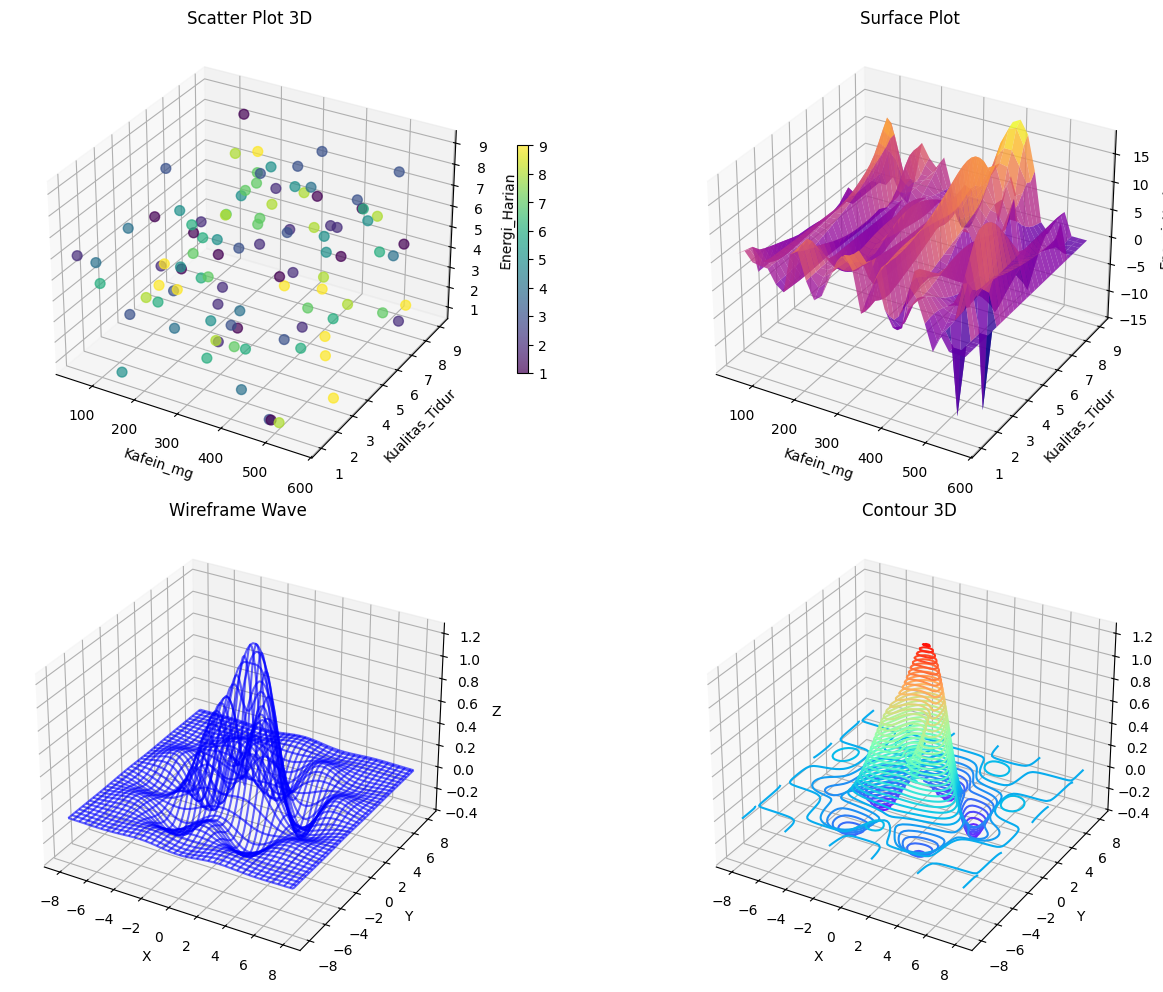

In [7]:
# ===================================================================
# 6. VISUALISASI DENGAN MATPLOTLIB 3D
# ===================================================================

print("\n📊 6. VISUALISASI MATPLOTLIB 3D")
print("-" * 30)

# Buat subplot matplotlib 3D
fig_mpl = plt.figure(figsize=(15, 10))

# Plot 1: Scatter 3D
ax1 = fig_mpl.add_subplot(221, projection='3d')
scatter = ax1.scatter(x_data, y_data, z_data, c=color_data, cmap='viridis', s=50, alpha=0.7)
ax1.set_xlabel(x_var)
ax1.set_ylabel(y_var)
ax1.set_zlabel(z_var)
ax1.set_title('Scatter Plot 3D')
plt.colorbar(scatter, ax=ax1, shrink=0.5)

# Plot 2: Surface
ax2 = fig_mpl.add_subplot(222, projection='3d')
surf = ax2.plot_surface(X_surf, Y_surf, Z_surf, cmap='plasma', alpha=0.8)
ax2.set_xlabel(x_var)
ax2.set_ylabel(y_var)
ax2.set_zlabel(z_var)
ax2.set_title('Surface Plot')

# Plot 3: Wireframe
ax3 = fig_mpl.add_subplot(223, projection='3d')
ax3.plot_wireframe(X_wave, Y_wave, Z_wave, color='blue', alpha=0.6)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Wireframe Wave')

# Plot 4: Contour 3D
ax4 = fig_mpl.add_subplot(224, projection='3d')
ax4.contour3D(X_wave, Y_wave, Z_wave, 50, cmap='rainbow')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.set_title('Contour 3D')

plt.tight_layout()
plt.show()

In [8]:
# ===================================================================
# 7. RINGKASAN DAN INTERPRETASI
# ===================================================================

print("\n📋 7. RINGKASAN ANALISIS")
print("-" * 30)

if x_var in df.columns:
    print(f"✅ Dataset berhasil dianalisis dengan {df.shape[0]} sampel")
    print(f"📊 Variabel yang divisualisasikan: {x_var}, {y_var}, {z_var}")
    print(f"📈 Rentang {x_var}: {df[x_var].min():.2f} - {df[x_var].max():.2f}")
    print(f"📈 Rentang {y_var}: {df[y_var].min():.2f} - {df[y_var].max():.2f}")
    print(f"📈 Rentang {z_var}: {df[z_var].min():.2f} - {df[z_var].max():.2f}")
    
    # Korelasi
    correlation_matrix = df[[x_var, y_var, z_var]].corr()
    print(f"\n🔗 KORELASI ANTAR VARIABEL:")
    print(correlation_matrix.round(3))
else:
    print("✅ Data contoh berhasil dibuat dan divisualisasikan")
    print("🌊 Wave plot menunjukkan gabungan gelombang sinus dengan decay eksponensial")

print("\n🎯 FITUR VISUALISASI:")
print("• 📊 Scatter Plot 3D Interaktif")
print("• 🌊 Surface Plot dengan interpolasi")
print("• 🕸️ Mesh Plot 3D")
print("• 📈 Wave Plot dengan gelombang kompleks")
print("• 🎨 Multiple colorscale dan styling")
print("• 🔄 Fully interactive (zoom, rotate, pan)")

print("\n💡 CARA MENGGUNAKAN:")
print("• Klik dan drag untuk merotasi visualisasi")
print("• Scroll untuk zoom in/out")
print("• Hover pada titik untuk melihat detail")
print("• Gunakan toolbar untuk berbagai kontrol")

print("\n🎉 VISUALISASI 3D INTERAKTIF SELESAI!")
print("="*60)


📋 7. RINGKASAN ANALISIS
------------------------------
✅ Dataset berhasil dianalisis dengan 100 sampel
📊 Variabel yang divisualisasikan: Kafein_mg, Kualitas_Tidur, Energi_Harian
📈 Rentang Kafein_mg: 51.00 - 565.00
📈 Rentang Kualitas_Tidur: 1.00 - 9.00
📈 Rentang Energi_Harian: 1.00 - 9.00

🔗 KORELASI ANTAR VARIABEL:
                Kafein_mg  Kualitas_Tidur  Energi_Harian
Kafein_mg           1.000          -0.015          0.083
Kualitas_Tidur     -0.015           1.000         -0.028
Energi_Harian       0.083          -0.028          1.000

🎯 FITUR VISUALISASI:
• 📊 Scatter Plot 3D Interaktif
• 🌊 Surface Plot dengan interpolasi
• 🕸️ Mesh Plot 3D
• 📈 Wave Plot dengan gelombang kompleks
• 🎨 Multiple colorscale dan styling
• 🔄 Fully interactive (zoom, rotate, pan)

💡 CARA MENGGUNAKAN:
• Klik dan drag untuk merotasi visualisasi
• Scroll untuk zoom in/out
• Hover pada titik untuk melihat detail
• Gunakan toolbar untuk berbagai kontrol

🎉 VISUALISASI 3D INTERAKTIF SELESAI!
